In [46]:
import pyathena as pa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#aws-mfa --duration 50000 --device arn:aws:iam::269962291848:mfa/rajjyv


In [36]:
conn  = pa.connect(s3_staging_dir='s3://data605leagueoflegends/',
    region_name='us-east-1',
    work_group='primary')

In [37]:
wdf = pd.read_sql('SELECT * FROM "data605_lol"."data605leagueoflegends2"',conn)
display(wdf)

,empty,teamid,win,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftharold,towerkills,inhibitorkills,baronkills,dragonkills,vilemawkills,riftheraldkills,dominionvictoryscore,gameid
0,,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,gameId
1,0,200,Win,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,9,1,0,3,0,2,0,4247263043.0
2,1,100,Win,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,4,0,0,2,0,2,0,4247155821.0
3,2,200,Win,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,5,1,0,2,0,2,0,4243963257.0
4,3,200,Win,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,6,0,1,3,0,1,0,4241678498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108825,108824,100,Win,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,9,2,1,3,0,0,0,4088497128.0
108826,108825,100,Win,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,5,0,1,2,0,0,0,4130964458.0
108827,108826,100,Win,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,6,1,2,3,0,1,0,4119954410.0
108828,108827,100,Win,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,10,2,0,2,0,0,0,4130440172.0


In [38]:
wdf = wdf.drop(columns=['empty'])


In [39]:
wdf = wdf.loc[wdf['gameid'].str[0].isin(['3','4'])]
wdf

,teamid,win,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftharold,towerkills,inhibitorkills,baronkills,dragonkills,vilemawkills,riftheraldkills,dominionvictoryscore,gameid
1,200,Win,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,9,1,0,3,0,2,0,4247263043.0
2,100,Win,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,4,0,0,2,0,2,0,4247155821.0
3,200,Win,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,5,1,0,2,0,2,0,4243963257.0
4,200,Win,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,6,0,1,3,0,1,0,4241678498.0
5,100,Win,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,11,3,2,2,0,2,0,4241538868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108825,100,Win,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,9,2,1,3,0,0,0,4088497128.0
108826,100,Win,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,5,0,1,2,0,0,0,4130964458.0
108827,100,Win,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,6,1,2,3,0,1,0,4119954410.0
108828,100,Win,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,10,2,0,2,0,0,0,4130440172.0


In [40]:
mdf = pd.read_sql('SELECT * FROM "data605_lol"."data605leagueoflegends3"',conn)


In [41]:
mdf = mdf.loc[mdf.gamemode=='CLASSIC']
mdf = mdf.drop(columns=['empty','gamecreation','gametype','gameversion','summonerid','currplatformid','curraccid'])

mdf

,gameduration,gameid,gamemode,mapid,participantid,platformid,accountid,summonername
1,1689.0,4192828942.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'vgHOcXpkB39bPartaYbxCoYlna0BNkR...,'summonerName': '괴해신살권'
2,953.0,3904470543.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'oNiwilDrO_XHhE5m-tQED9cWLj8g1cU...,'summonerName': '예쁘고 착해요'
3,1344.0,4149313042.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'rxB6-dAxYR8Kk-15Ytn8-U9UxelefBF...,'summonerName': 'DenZ'
4,1189.0,4179721747.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'TNaMSH15-M6xstlKB3oHq9wZGoVvBD3...,'summonerName': '낙지요'
5,1714.0,4085349916.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'meDLLW7pv92v4QtmD-aEzeY8AjXU7m_...,'summonerName': '롤접는게작년목표'
...,...,...,...,...,...,...,...,...
108824,1931.0,4139304596.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'kmJWuGYcz6KsZ2lWXY9fiv4L6BCTY62...,'summonerName': '벽을느껴버린사람'
108825,1361.0,4028155540.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'FsW31XnB8Vc6T9e_-Pp4PGnosHU2ub1...,'summonerName': '메 달'
108827,1373.0,4250977945.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': '63uwxELH81xYSk0f6A1qw0nGbjzsKAc...,'summonerName': '페미니즘 열공중'
108828,1623.0,4242589339.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'OCgo5lREXyKbRbpqP61A9JFGJBHPSds...,'summonerName': '내 꿈을 펼쳐라'


In [42]:
ldf = pd.read_sql('SELECT * FROM "data605_lol"."data605leagueoflegends4"',conn)
ldf

,empty,teamid,win,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftharold,towerkills,inhibitorkills,baronkills,dragonkills,vilemawkills,riftheraldkills,dominionvictoryscore,gameid
0,,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,gameId
1,0,100,Fail,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,0,0,0,0,0,4247263043.0
2,1,200,Fail,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,2,0,0,0,0,0,0,4247155821.0
3,2,100,Fail,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,0,0,0,0,0,4243963257.0
4,3,100,Fail,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,2,0,1,1,0,0,0,4241678498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108825,108824,200,Fail,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,3,0,0,1,0,0,0,4088497128.0
108826,108825,200,Fail,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,3,0,0,2,0,2,0,4130964458.0
108827,108826,200,Fail,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,6,1,0,3,0,1,0,4119954410.0
108828,108827,200,Fail,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,5,0,1,3,0,0,0,4130440172.0


In [43]:
ldf = ldf.loc[ldf['gameid'].str[0].isin(['3','4'])]
ldf

,empty,teamid,win,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftharold,towerkills,inhibitorkills,baronkills,dragonkills,vilemawkills,riftheraldkills,dominionvictoryscore,gameid
1,0,100,Fail,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,0,0,0,0,0,4247263043.0
2,1,200,Fail,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,2,0,0,0,0,0,0,4247155821.0
3,2,100,Fail,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,0,0,0,0,0,0,0,4243963257.0
4,3,100,Fail,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,2,0,1,1,0,0,0,4241678498.0
5,4,200,Fail,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,6,1,1,3,0,0,0,4241538868.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108825,108824,200,Fail,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,3,0,0,1,0,0,0,4088497128.0
108826,108825,200,Fail,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,3,0,0,2,0,2,0,4130964458.0
108827,108826,200,Fail,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,6,1,0,3,0,1,0,4119954410.0
108828,108827,200,Fail,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,5,0,1,3,0,0,0,4130440172.0


In [122]:
wins_data = wdf.merge(mdf,on=['gameid']).head(50)
loss_data = ldf.merge(mdf,on=['gameid']).head(50)

master = pd.concat([wins_data,loss_data])

master['win'] = np.where(master['win']=='Win','W','L')

master = master.reset_index()
#master = master.head(50000)
master

,index,teamid,win,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftharold,towerkills,...,dominionvictoryscore,gameid,gameduration,gamemode,mapid,participantid,platformid,accountid,summonername,empty
0,0,200,W,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,9,...,0,4247263043.0,1323.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'LhCH2yaixm5FZ6dHybuexqHNckeV0RQ...,'summonerName': '쪼렙이다말로하자',NaN
1,1,100,W,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,4,...,0,4247155821.0,1317.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'F23ggf384dqSm_YjnKOXZ6AzT9AIuXn...,'summonerName': 'LPL Player',NaN
2,2,200,W,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,5,...,0,4243963257.0,932.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'K81BH-YaxpRjP5e9YIRcSvydwzCneax...,'summonerName': '호잇이',NaN
3,3,200,W,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,6,...,0,4241678498.0,2098.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'W5QWj6ej2VQgu1UunwFuGcNgBBz_io7...,'summonerName': '213321123',NaN
4,4,100,W,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,11,...,0,4241538868.0,2344.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'ImPwfj9Gb0tPHcMMnjVc6w44Aedoxng...,'summonerName': 'ggffggg',NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,100,L,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,4,...,0,4160473191.0,2323.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'K81BH-YaxpRjP5e9YIRcSvydwzCneax...,'summonerName': '호잇이',45
96,46,100,L,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,2,...,0,4158940409.0,1459.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': '2bQVJWIZRCze73cE2tm2iEX-pg1y5Mu...,'summonerName': 'DRX Seonbi',46
97,47,200,L,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,3,...,0,4158792026.0,1845.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'xtwqWaDuQs_KCEp7OGwF2aTTDU1S2ot...,'summonerName': '불다이아',47
98,48,100,L,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,3,...,0,4158690093.0,1725.0,CLASSIC,11.0,"""[{'participantId': 1",'player': {'platformId': 'KR','accountId': 'k1clnQm6WYzfh-3jDA5W70Cv3vtLS_o...,'summonerName': '역시폭군',48


In [127]:
X = master.drop(columns=['teamid','win','gameid','dominionvictoryscore','gamemode','mapid','participantid','platformid',
                        'accountid','summonername','empty','index'])
X['firstblood'] = np.where(X['firstblood']=='TRUE','1','0')
X['firstinhibitor'] = np.where(X['firstblood']=='TRUE','1','0')
X['firstbaron'] = np.where(X['firstblood']=='TRUE','1','0')
X['firstdragon'] = np.where(X['firstblood']=='TRUE','1','0')
X['firstriftharold'] = np.where(X['firstblood']=='TRUE','1','0')
X['firsttower'] = np.where(X['firstblood']=='TRUE','1','0')
X


,firstblood,firsttower,firstinhibitor,firstbaron,firstdragon,firstriftharold,towerkills,inhibitorkills,baronkills,dragonkills,vilemawkills,riftheraldkills,gameduration
0,0,0,0,0,0,0,9,1,0,3,0,2,1323.0
1,0,0,0,0,0,0,4,0,0,2,0,2,1317.0
2,1,0,0,0,0,0,5,1,0,2,0,2,932.0
3,1,0,0,0,0,0,6,0,1,3,0,1,2098.0
4,1,0,0,0,0,0,11,3,2,2,0,2,2344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,4,0,0,0,0,1,2323.0
96,0,0,0,0,0,0,2,0,0,0,0,2,1459.0
97,0,0,0,0,0,0,3,0,1,1,0,0,1845.0
98,0,0,0,0,0,0,3,0,0,0,0,0,1725.0


In [128]:
Y = pd.DataFrame()
Y = master['win']
Y

0     W
1     W
2     W
3     W
4     W
     ..
95    L
96    L
97    L
98    L
99    L
Name: win, Length: 100, dtype: object

In [129]:
features = list(X.columns.values)
print(features)
labels = Y
labels = list(np.sort(labels.unique()))
print(labels)

['firstblood', 'firsttower', 'firstinhibitor', 'firstbaron', 'firstdragon', 'firstriftharold', 'towerkills', 'inhibitorkills', 'baronkills', 'dragonkills', 'vilemawkills', 'riftheraldkills', 'gameduration']
['L', 'W']


In [142]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

k=2
clf = tree.DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, Y, cv=k)
scores

array([0.78, 0.74])

In [143]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), (scores.std() * 2)/k**(1/2)))
scores.mean()

Accuracy: 0.76 (+/- 0.03)


0.76

In [144]:
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

[20.0, 20.0]


TRAIN: [ 0  9 10 11 12 14 19 20 21 23 25 28 29 31 32 34 35 36 37 39 44 46 47 49
 50 52 57 58 59 64 65 66 67 69 70 72 77 79 81 83 84 85 87 88 89 91 94 96
 97 98] TEST: [ 1  2  3  4  5  6  7  8 13 15 16 17 18 22 24 26 27 30 33 38 40 41 42 43
 45 48 51 53 54 55 56 60 61 62 63 68 71 73 74 75 76 78 80 82 86 90 92 93
 95 99]
model score =  0.72
Average K-Fold Score : 0.76
TRAIN: [ 1  2  3  4  5  6  7  8 13 15 16 17 18 22 24 26 27 30 33 38 40 41 42 43
 45 48 51 53 54 55 56 60 61 62 63 68 71 73 74 75 76 78 80 82 86 90 92 93
 95 99] TEST: [ 0  9 10 11 12 14 19 20 21 23 25 28 29 31 32 34 35 36 37 39 44 46 47 49
 50 52 57 58 59 64 65 66 67 69 70 72 77 79 81 83 84 85 87 88 89 91 94 96
 97 98]
model score =  0.82
Average K-Fold Score : 0.76


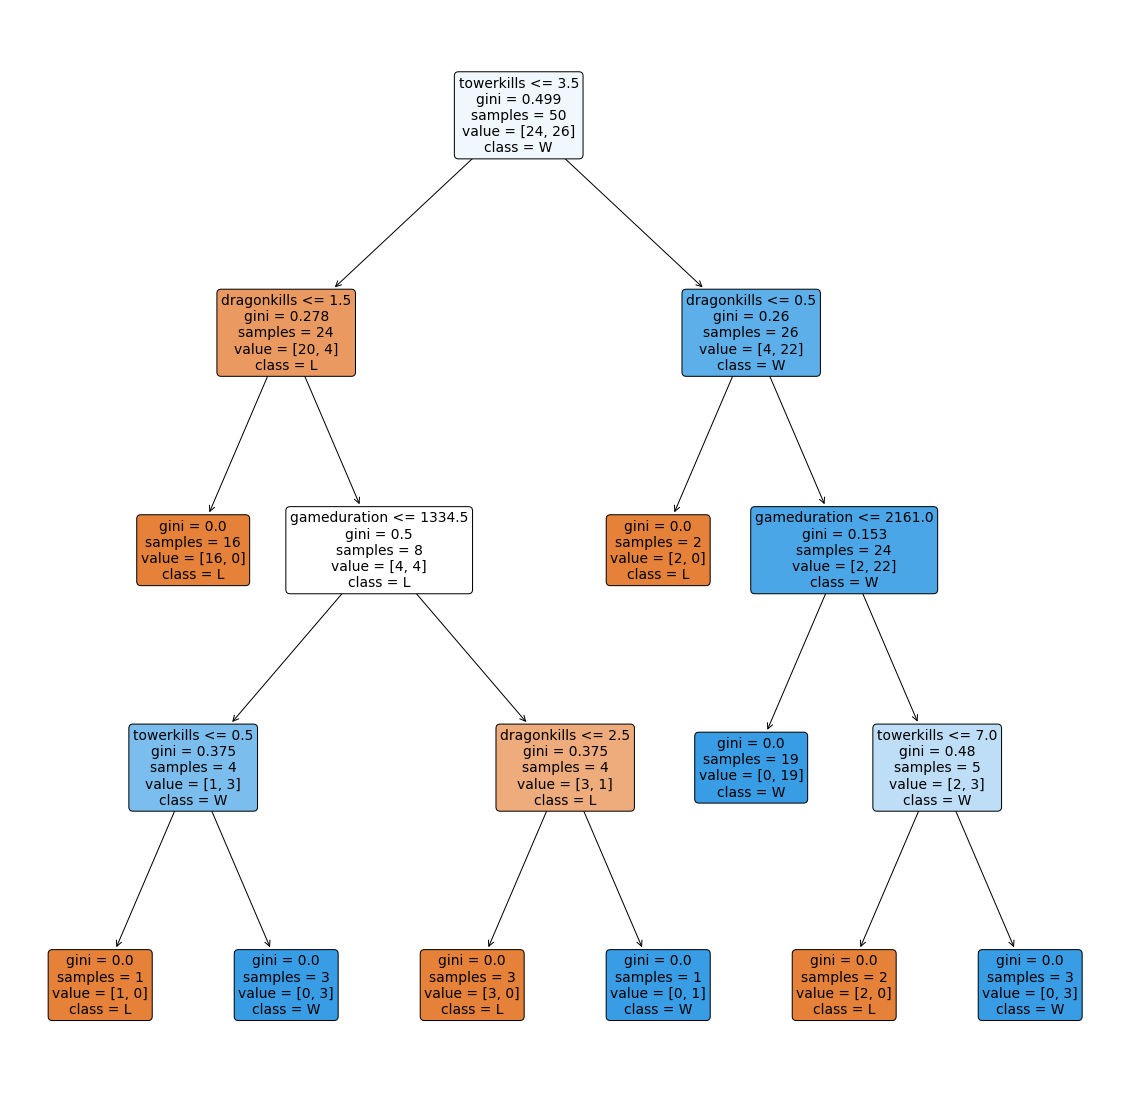

In [145]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = k, shuffle = True, random_state = 0)
i=0
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",model.score(x_test,y_test))
    print('Average K-Fold Score :' , np.mean(scores)) 
    #plt.figure()
    x = tree.plot_tree(model,rounded=True,filled=True,class_names=labels,feature_names=features) 